In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kaleido
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
fasst_19_path = '../../../data/SOD/model_results/chapter_19/FASST_CONC_INCOME_DENSITY_05082024.xlsx'
ifs_19_path = '../../../data/SOD/model_results/chapter_19/IFS_data_GEO_Income_Density_Groups.xlsx'
gtem_19_path = '../../../data/SOD/model_results/chapter_19/GEO7-GTEM results for Chaper 19.xlsx'
results_19_path = '../../../data/SOD/model_results/to_share/model_results_to_share_Chapter_19.xlsx'

In [25]:
df_fasst = pd.read_excel(fasst_19_path)
# df_fasst.rename(unit={
#     'REF':'REF-v2',
#     'TECH-TP': 'TECH-TP-v2',
#     'LIFE-TP': 'LIFE-TP-v2'
#     },
#     )

# df_unclean.columns = df_unclean.columns.str.lower()
df_fasst['SCENARIO'] = df_fasst['SCENARIO'].replace({'UN_LIFE': 'LIFE-TP-v2',
                                                   'UN_TECH': 'TECH-TP-v2',
                                                   'REF':'REF-v2',
                                                   'TECH-TP': 'TECH-TP-v2',
                                                   'LIFE-TP': 'LIFE-TP-v2'
                                                  })

df_fasst['REGION'] = df_fasst['REGION'].replace({
    'LOW_INCOME_HIGH_DENSITY':'Low-Income, High Density', 
    'LOW_INCOME_LOW_DENSITY':'Low-Income, Low Density',
    'MIDDLE_INCOME_HIGH_DENSITY':'Middle-Income, High Density', 
    'MIDDLE_INCOME_LOW_DENSITY':'Middle-Income, Low Density',
    'HIGH_INCOME_HIGH_DENSITY':'High-Income, High Density', 
    'HIGH_INCOME_LOW_DENSITY':'High-Income, Low Density',
    'LOW_INCOME':'Low-Income', 
    'HIGH_INCOME':'High-Income', 
    'MIDDLE_INCOME':'Middle-Income'
    })

df_ifs = pd.read_excel(ifs_19_path, sheet_name='HDI')
df_ifs['Scenario'] = df_ifs['Scenario'].replace({
                                                   'GEOREF':'REF-v2',
                                                   'GEOTech': 'TECH-TP-v2',
                                                   'GEOLife': 'LIFE-TP-v2'
                                                  })

df_ifs['Region'] = df_ifs['Region'].replace({
    'GEO Low-Income High Density':'Low-Income, High Density', 
    'GEO Low-Income Low Density':'Low-Income, Low Density',
    'GEO Middle-Income High Density':'Middle-Income, High Density', 
    'GEO Middle-Income Low Density':'Middle-Income, Low Density',
    'GEO High-Income High Density':'High-Income, High Density', 
    'GEO High-Income Low Density':'High-Income, Low Density',
    'GEO- Low Income':'Low-Income', 
    'GEO-HighIncome':'High-Income', 
    'GEO-Middle Income':'Middle-Income'
    })

df_gtem = pyam.IamDataFrame(gtem_19_path)
df_gtem.rename(region={
    'High income':'High-Income',
    'Low income':'Low-Income',
    'Middle income':'Middle-Income',
}, inplace=True)


df_aim_image_globio = pyam.IamDataFrame(results_19_path)
df_aim_image_globio.rename(scenario={
    'REF':'REF-v2',
    'TECH-TP':'TECH-TP-v2',
    'LIFE-TP':'LIFE-TP-v2',
}, inplace=True)
print(df_aim_image_globio)



var_list = [
        'Concentration|PM2.5',
        'Emissions|Kyoto Gases',
        'Emissions|CO2',
        'Emissions|CH4',
        'Emissions|N2O',
        # 'Human Development Index', # Doesnt make sense to show percental differences, is an index
        'Terrestrial Biodiversity|MSA',
        'Material demand|Biomass',
        'Material demand|Fossil fuels',
        'Material demand|Metal ores',
        'Material demand|Non-metallic minerals',
        'Secondary Energy|Electricity',
        # 'Secondary Energy|Electricity|Biomass',
        # 'Secondary Energy|Electricity|Coal',
        # 'Secondary Energy|Electricity|Gas',
        # 'Secondary Energy|Electricity|Non-Biomass Renewables',
        # 'Secondary Energy|Electricity|Nuclear',
        # 'Secondary Energy|Electricity|Oil',
        'Final Energy',
        # 'Final Energy|Bunkers',
        # 'Final Energy|Industry',
        # 'Final Energy|Other Sector',
        # 'Final Energy|Per Capita',
        # 'Final Energy|Residential and Commercial',
        # 'Final Energy|Transportation',
        'Land Cover|Cropland',
        'Land Cover|Forest and Other Natural Land',
        # 'Land Cover|Other',
        'Land Cover|Pasture',
        # GDP|PPP|Narrative and Climate Effects
        ]

df = pyam.concat([df_aim_image_globio, df_fasst, df_gtem, df_ifs])
print(f"test", df)
df = df.filter(region=[
        # 'Low-Income, High Density', 
        # 'Low-Income, Low Density',
        # 'Middle-Income, High Density', 
        # 'Middle-Income, Low Density',
        # 'High-Income, High Density', 
        # 'High-Income, Low Density',
        'Low-Income', 
        'High-Income', 
        'Middle-Income'
        ],
        variable=var_list,
        year=[2030, 2050])
df = df.filter(
        variable='Terrestrial Biodiversity|MSA',
        year=[2030], keep=False)
df.filter(variable='Terrestrial Biodiversity|MSA',).timeseries()

[INFO] 12:18:54 - pyam.core: Reading file ..\..\..\data\SOD\model_results\chapter_19\GEO7-GTEM results for Chaper 19.xlsx
[INFO] 12:18:55 - pyam.core: Reading file ..\..\..\data\SOD\model_results\to_share\model_results_to_share_Chapter_19.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, Land, Macro_Economy (5)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, High-Income, High Density, ... Middle-Income, Low Density (9)
   variable : Area, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA|Vertebrates (44)
   unit     : %, EJ / million / a, EJ/yr, Mt CH4/yr, ... thousand USD_2010/yr (13)
   year     : 2010, 2020, 2025, 2030, 2035, 2040, 2045, 2050, ... 2100 (13)
test <class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Macro_Economy (8)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High income, High density, High income, Low density, ... UNEPWEurope (20)
   variable : Area, Concentration|PM2.5, Emissions|CH4, ... Terrestrial Biodiversity|MSA|Vertebrates (50)
   unit     : %, EJ / million / a, EJ/yr, Index, Mt CH4/y

2050
model        scenario   region        variable                     unit      
Biodiversity LIFE-TP-v2 High-Income   Terrestrial Biodiversity|MSA %     59.0
                        Low-Income    Terrestrial Biodiversity|MSA %     55.0
                        Middle-Income Terrestrial Biodiversity|MSA %     59.0
             REF-v2     High-Income   Terrestrial Biodiversity|MSA %     57.0
                        Low-Income    Terrestrial Biodiversity|MSA %     52.0
                        Middle-Income Terrestrial Biodiversity|MSA %     56.0
             TECH-TP-v2 High-Income   Terrestrial Biodiversity|MSA %     59.0
                        Low-Income    Terrestrial Biodiversity|MSA %     55.0
                        Middle-Income Terrestrial Biodiversity|MSA %     59.0

In [26]:
def bar_figures_sns(df, variable):
    # Combine scenario and region into one column
    df = df.data
    df.year = df.year.apply(str)
    df.value = df.value.apply(int)
    df['year_region'] = df['year'] + ' - ' + df['region']

    # Define a custom order for the x-axis (scenario-region order)
    if variable == 'Terrestrial Biodiversity|MSA':
        custom_order = [
        '2050 - Low-Income',
        '2050 - Middle-Income',
        '2050 - High-Income', 
        ]
    else:
        custom_order = [
            '2030 - Low-Income',
            '2050 - Low-Income',
            '2030 - Middle-Income',
            '2050 - Middle-Income',
            '2030 - High-Income', 
            '2050 - High-Income', 
            ]

    df.scenario = df.scenario.replace(
        {
        # Define the color palette for scenarios
        "REF-v2": "Current Trends",
        "LIFE-TP-v2": "Behaviour-focused",
        "TECH-TP-v2": "Technology-focused",
        }
    )

    color_dict = {
        # Define the color palette for scenarios
        "Current Trends": "black",
        "Behaviour-focused": "navajowhite",
        "Technology-focused": "darkmagenta",
    }

    # Convert the 'scenario_region' column to a categorical type with the custom order
    df['year_region'] = pd.Categorical(df['year_region'], categories=custom_order, ordered=True)

    # Sort the DataFrame by 'year_region'
    df = df.sort_values('year_region')

    # Create a new column with percentage sign for text labels
    df['value_with_percent'] = df['value'].astype(str) + '%'

    # Create subplots with custom figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the grouped bar plot using Seaborn
    sns.barplot(data=df, x='year_region', y='value', hue='scenario', palette='tab10', ax=ax)

    # Add value labels (with percentages) above the bars
    # One weird extra patch at the end
    for p in ax.patches[:-2]:
        ax.annotate(f'{int(p.get_height())}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, xytext=(0, 3),
                    textcoords='offset points')

    # Customize the chart title, axis labels, and legend
    ax.set_title(f'{variable} Difference from\nCurrent Trends by 2030 and 2050', fontsize=16)
    ax.set_xlabel('Scenario - Region', fontsize=12)
    ax.set_ylabel('%', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
    ax.legend(title='Scenario', bbox_to_anchor=(1, 1))

    # Adjust layout to ensure the plot fits well
    plt.tight_layout()
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    plt.savefig(
        f"../../../plots/SOD/chpt_19/3_group/{variable_name}_percental_differences.png",
        bbox_inches='tight'
    )
    plt.savefig(
        f"../../../plots/SOD/chpt_19/3_group/{variable_name}_percental_differences.svg",
        bbox_inches='tight'
    )
    # Show the plot
    plt.show()

    # Save the figure as PNG and SVG
    # fig.savefig('test_figure.png')
    # fig.savefig('test_figure.svg')

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


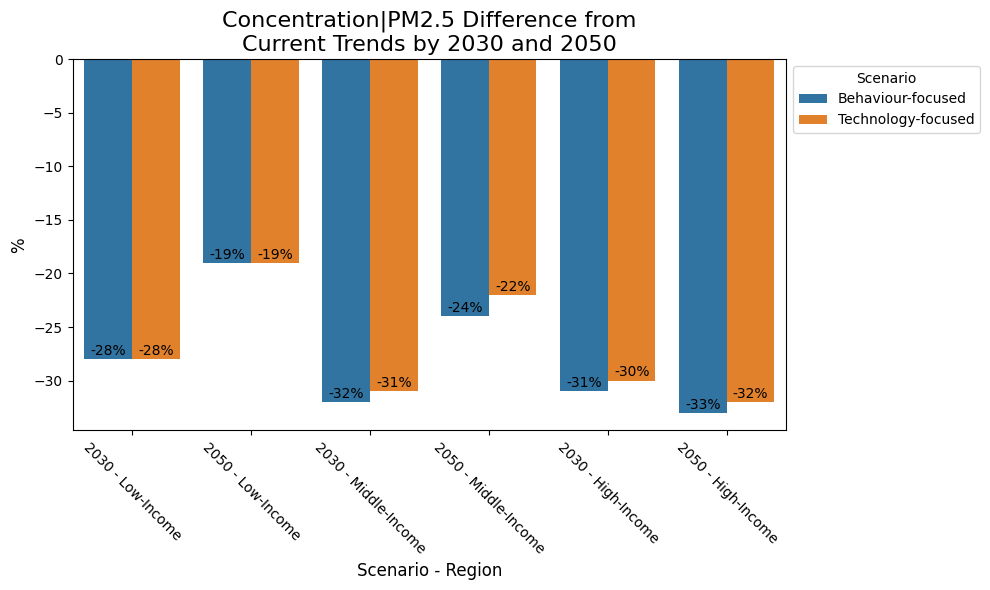

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


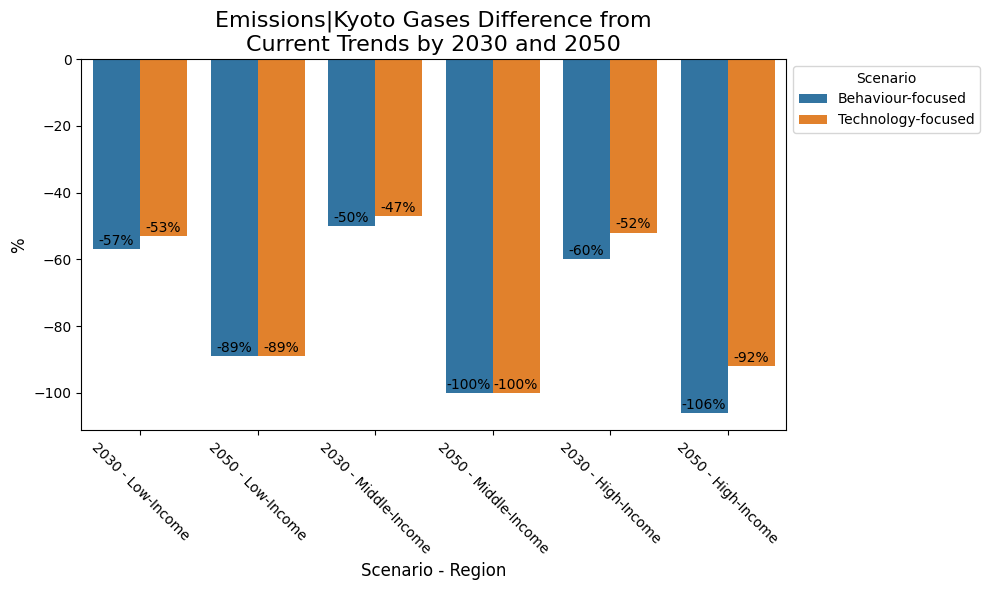

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


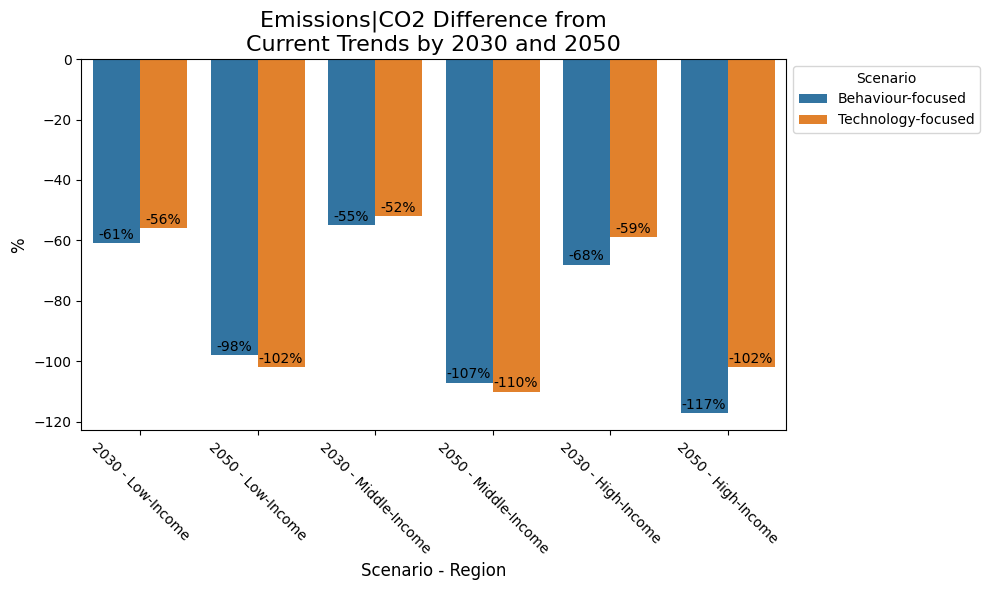

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


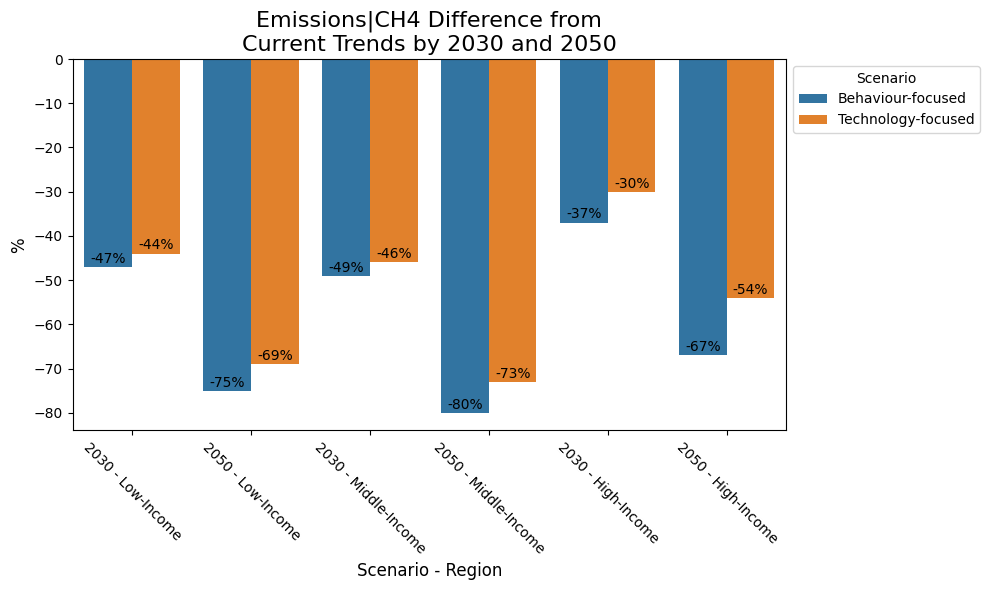

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


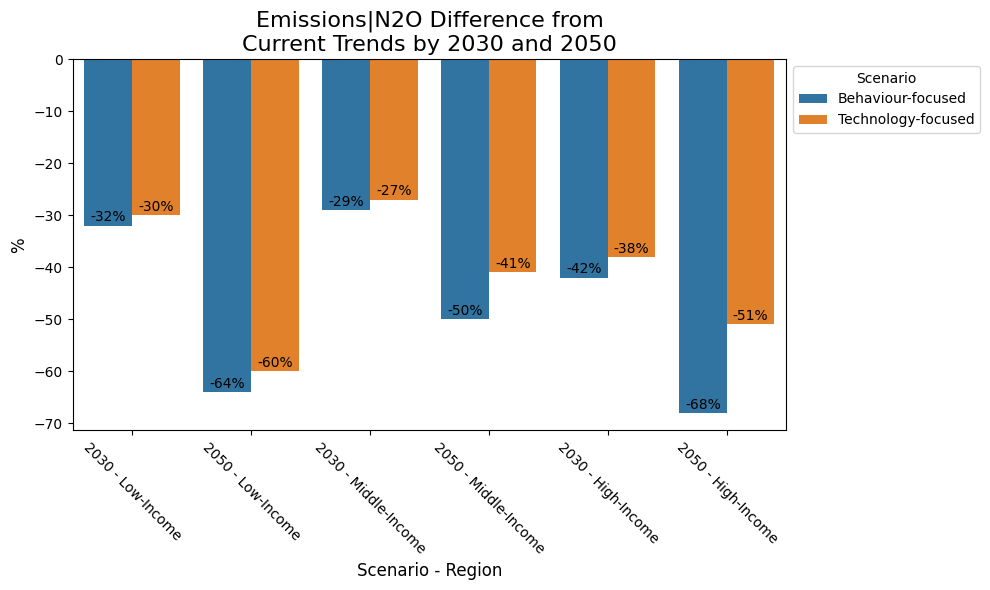

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


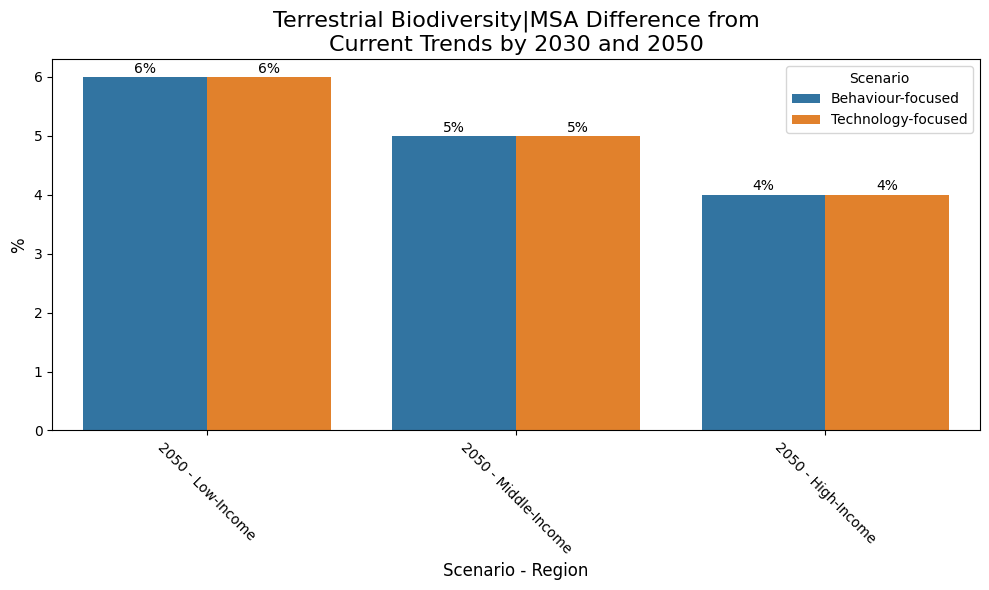

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


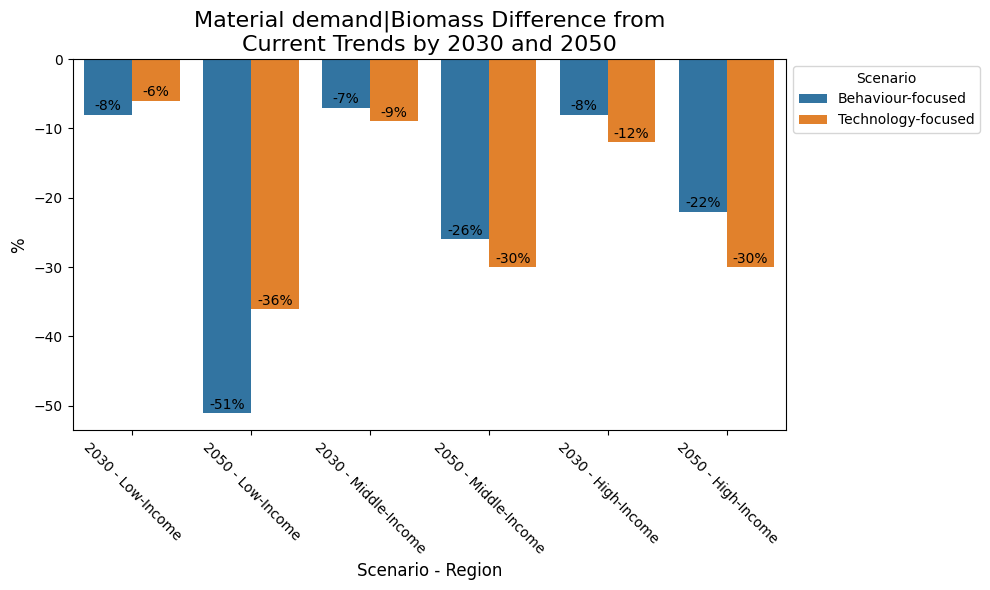

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


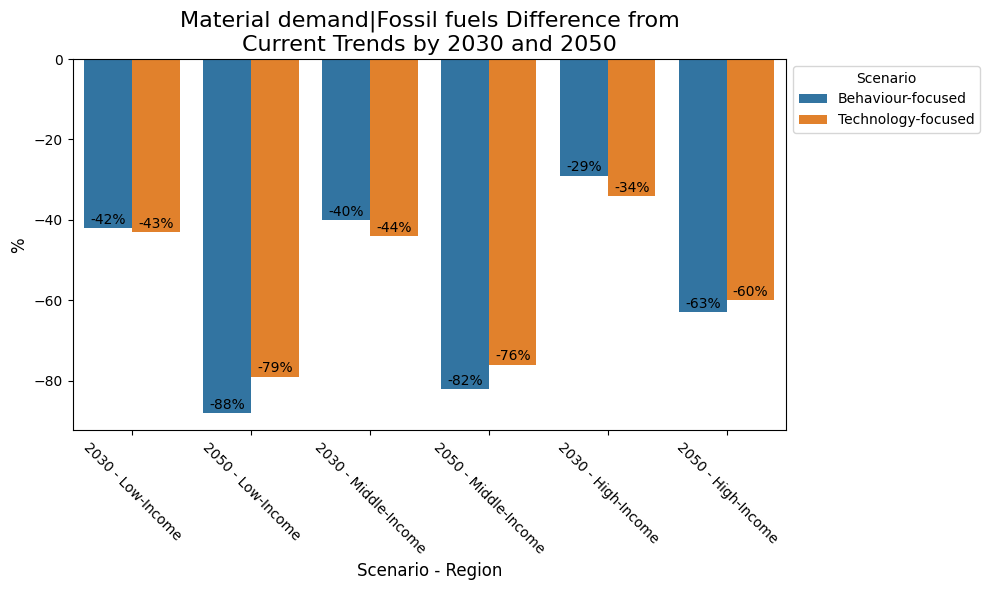

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


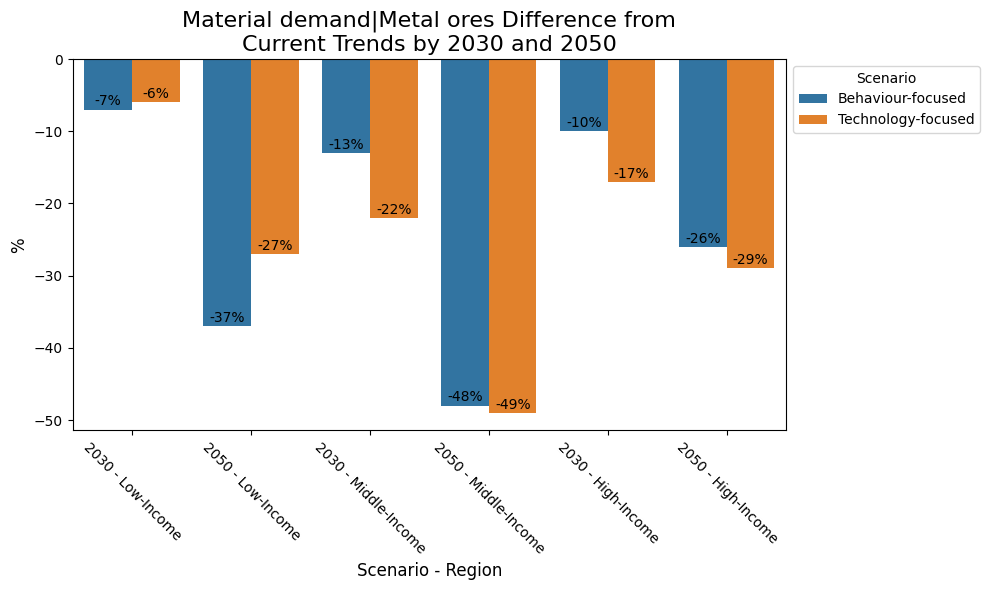

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


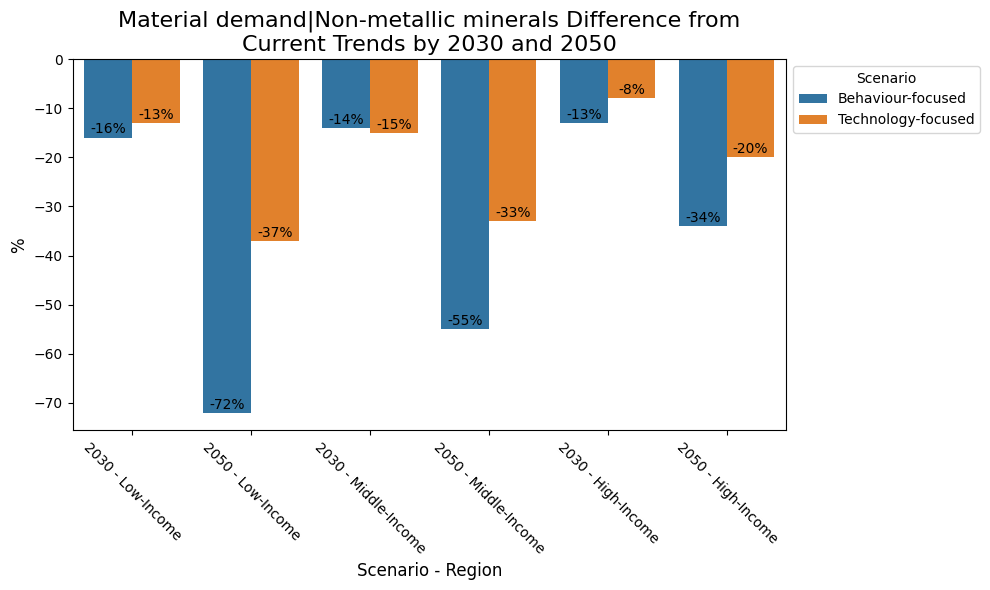

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


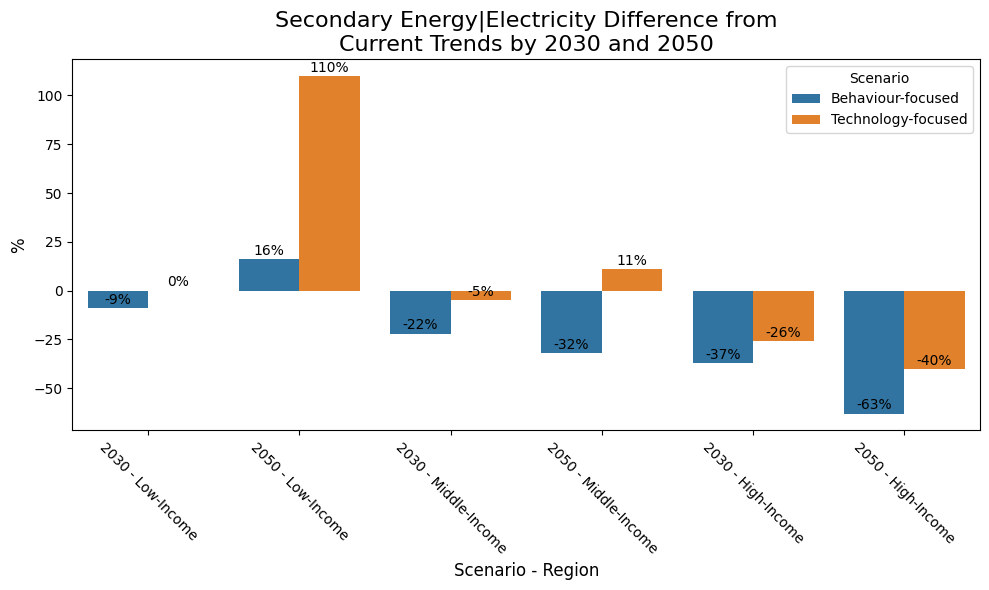

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


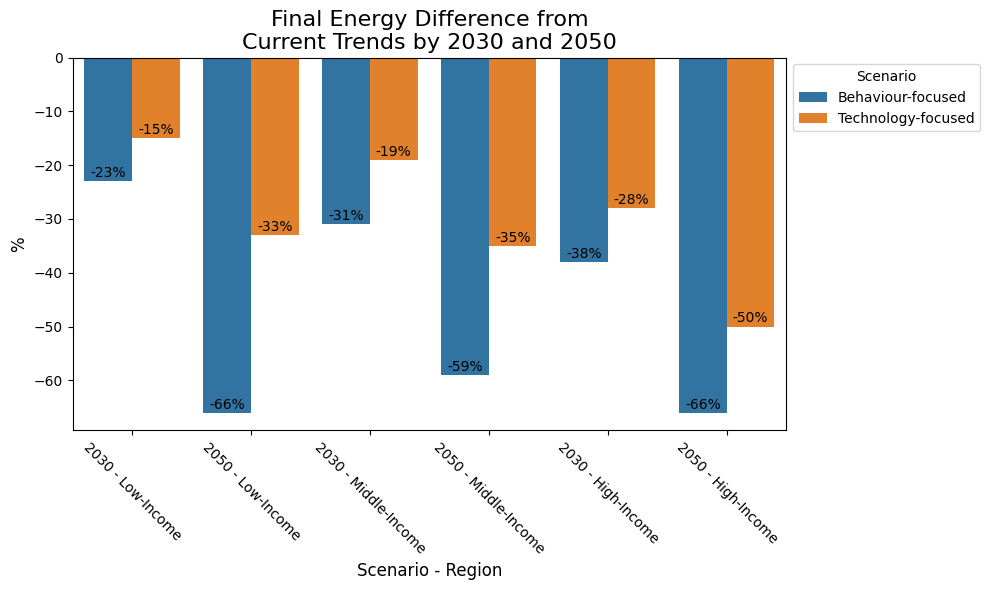

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


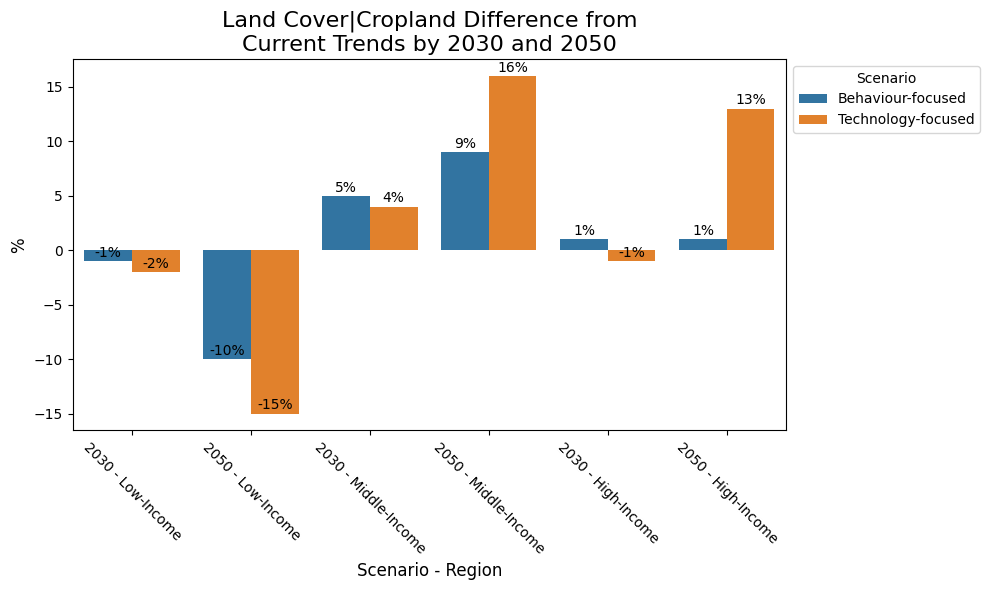

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


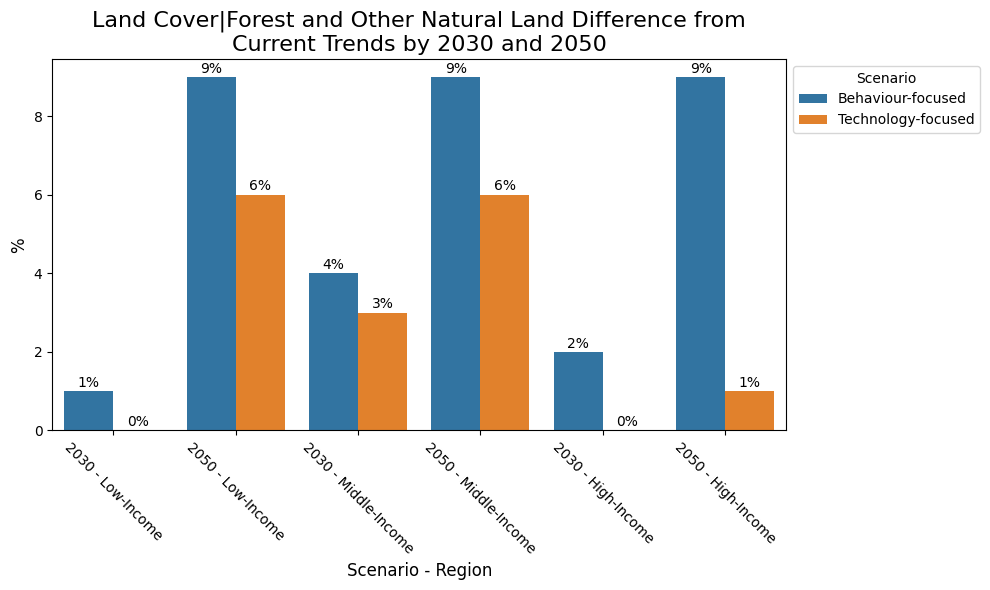

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity, Emissions, Energy, GTEM-Resource_2023, ... Land (6)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : High-Income, Low-Income, Middle-Income (3)
   variable : Concentration|PM2.5, Emissions|CH4, Emissions|CO2, ... Terrestrial Biodiversity|MSA (15)
   unit     : %, EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... µg/m3 (9)
   year     : 2030, 2050 (2)


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_14868\1171090459.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


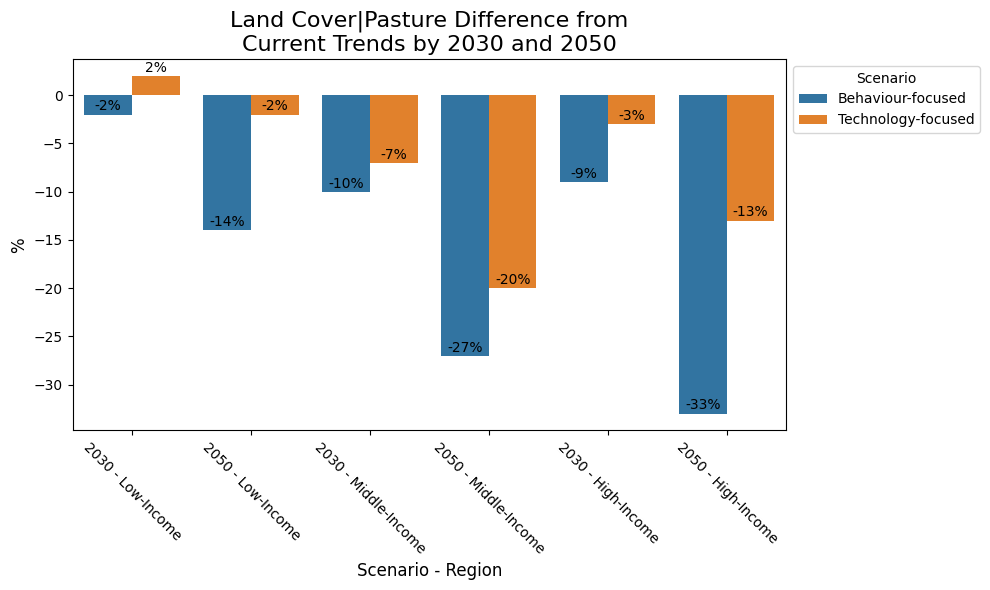

In [27]:
for variable in var_list:
    # Filter data for the two scenarios
    print(df)
    df_ref = df.filter(scenario='REF-v2', variable=variable).data
    df_life = df.filter(scenario="LIFE-TP-v2", variable=variable).data
    df_tech = df.filter(scenario="TECH-TP-v2", variable=variable).data
    # Subtract Scenario 1 from Scenario 2 (difference)
    # difference = scenario2.subtract(scenario1)

    # Calculate the percentage difference by dividing the difference by Scenario 1
    # Multiply by 100 for percentage
    # percentage_difference = difference.divide(scenario1).times(100)
    # percentage_difference


    # Merge the two scenarios on the common dimensions (e.g., year)
    merged_life = pd.merge(df_ref, df_life, on=['year', 'region'], suffixes=('_ref', '_scen'))
    merged_tech = pd.merge(df_ref, df_tech, on=['year', 'region'], suffixes=('_ref', '_scen'))

    # Calculate the percentage difference
    merged_life['percentage_difference'] = round(100 * (merged_life['value_scen'] - merged_life['value_ref']) / merged_life['value_ref'])
    merged_tech['percentage_difference'] = round(100 * (merged_tech['value_scen'] - merged_tech['value_ref']) / merged_tech['value_ref'])

    merged = pd.concat([merged_life, merged_tech])

    merged_renamed = merged.rename(columns={
        'model_scen': 'model',
        'scenario_scen': 'scenario',
        'variable_scen': 'variable',
        'unit_scen': 'unit',
        'percentage_difference': 'value'  # 'value' is the column expected for IamDataFrame
    })
    merged_renamed['variable'] = merged_renamed['variable'] + '|Percental Difference with REF'
    # Filter the necessary columns for pyam
    columns_needed = ['model', 'scenario', 'region', 'variable', 'unit', 'year', 'value']
    pyam_ready_df = merged_renamed[columns_needed]

    # Convert the Pandas DataFrame back to a pyam.IamDataFrame
    df_diff = pyam.IamDataFrame(pyam_ready_df)
    # if variable == 'Terrestrial Biodiversity|MSA':
    #     print(df_diff.timeseries())
    # df_diff.timeseries()
    bar_figures_sns(df_diff, variable)